<a href="https://www.kaggle.com/code/klyushnik/nlp-natural-language-processing-xgb-and-lstm?scriptVersionId=168293954" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 

warnings.filterwarnings('ignore')

import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


In [3]:
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [4]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [8]:
print('Missing values train',train.isnull().sum(), sep='')
print('Missing values test',train.isnull().sum(), sep='')

Missing values trainid             0
keyword       61
location    2533
text           0
target         0
dtype: int64
Missing values testid             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [9]:
train.fillna(' ', inplace= True)
test.fillna(' ', inplace= True)

In [10]:
test.head()

,id,keyword,location,text
0,0,,,Just happened a terrible car crash
1,2,,,"Heard about #earthquake is different cities, s..."
2,3,,,"there is a forest fire at spot pond, geese are..."
3,9,,,Apocalypse lighting. #Spokane #wildfires
4,11,,,Typhoon Soudelor kills 28 in China and Taiwan


In [11]:
from wordcloud import WordCloud, STOPWORDS

<AxesSubplot:>

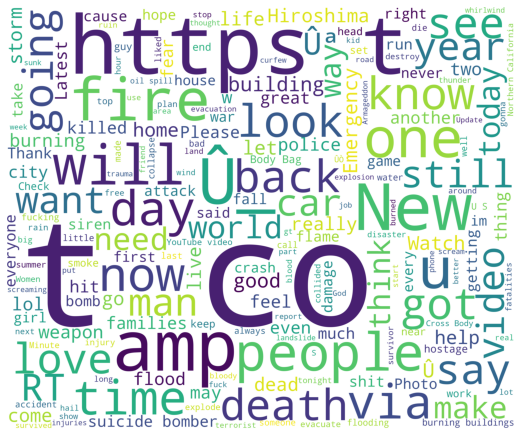

In [12]:
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus
# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42,
                                                       
                         ).generate(str_corpus(corpus))
    return wordCloud

corpus = get_corpus(train['text'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<AxesSubplot:>

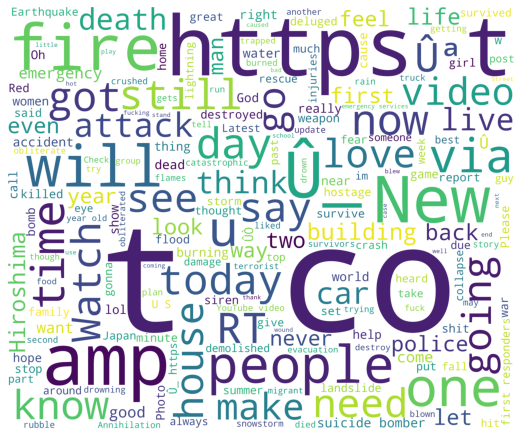

In [13]:
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus
# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

corpus = get_corpus(test['text'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [14]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
english_stopwords = stopwords.words('english')

# Удаление знаков пунктуации из текста
def remove_punct(text):
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)

train['text'] = train['text'].map(lambda x: x.lower())
train['text'] = train['text'].map(lambda x: remove_punct(x))
train['text'] = train['text'].map(lambda x: x.split(' '))
train['text'] = train['text'].map(lambda x: [token for token in x if token not in english_stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
train['text'] = train['text'].map(lambda x: ' '.join(x))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
train.head()

,id,keyword,location,text,target
0,1,,,deeds reason earthquake may allah forgive us,1
1,4,,,forest fire near la ronge sask canada,1
2,5,,,residents asked shelter place notified officer...,1
3,6,,,13 000 people receive wildfires evacuation ord...,1
4,7,,,got sent photo ruby alaska smoke wildfires pou...,1


In [16]:
test['text'] = test['text'].map(lambda x: x.lower())
test['text'] = test['text'].map(lambda x: remove_punct(x))
test['text'] = test['text'].map(lambda x: x.split(' '))
test['text'] = test['text'].map(lambda x: [token for token in x if token not in english_stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
test['text'] = test['text'].map(lambda x: ' '.join(x))

In [17]:
test.head()

,id,keyword,location,text
0,0,,,happened terrible car crash
1,2,,,heard earthquake different cities stay safe ev...
2,3,,,forest fire spot pond geese fleeing across str...
3,9,,,apocalypse lighting spokane wildfires
4,11,,,typhoon soudelor kills 28 china taiwan


In [18]:
train['text_total'] = train['keyword'] + train['location'] + train['text']
test['text_total'] = test['keyword'] + test['location'] + test['text']
train.head()

,id,keyword,location,text,target,text_total
0,1,,,deeds reason earthquake may allah forgive us,1,deeds reason earthquake may allah forgive us
1,4,,,forest fire near la ronge sask canada,1,forest fire near la ronge sask canada
2,5,,,residents asked shelter place notified officer...,1,residents asked shelter place notified offic...
3,6,,,13 000 people receive wildfires evacuation ord...,1,13 000 people receive wildfires evacuation o...
4,7,,,got sent photo ruby alaska smoke wildfires pou...,1,got sent photo ruby alaska smoke wildfires p...


In [19]:
df_train = train.copy(deep = True)
df_test = test.copy(deep = True)

In [20]:
df_train = df_train.drop(df_train[['id', 'keyword', 'location', 'text']], axis = 1)
df_test = df_test.drop(df_test[['id', 'keyword', 'location', 'text']], axis = 1)
df_train.head()

,target,text_total
0,1,deeds reason earthquake may allah forgive us
1,1,forest fire near la ronge sask canada
2,1,residents asked shelter place notified offic...
3,1,13 000 people receive wildfires evacuation o...
4,1,got sent photo ruby alaska smoke wildfires p...


<AxesSubplot:>

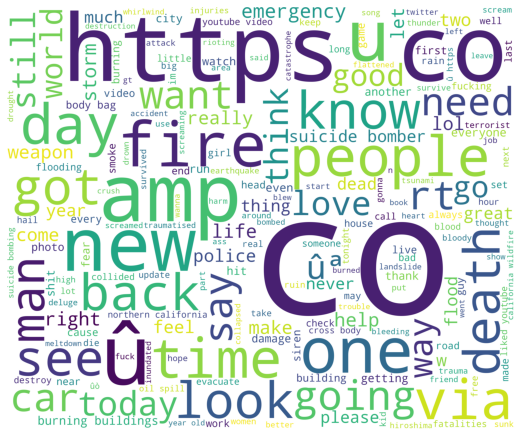

In [21]:
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus
# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42,
                                                       
                         ).generate(str_corpus(corpus))
    return wordCloud

corpus = get_corpus(train['text'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train['text_total'], train['target'], test_size=0.4, random_state=42)

In [23]:
sgd_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sgd_clf', SGDClassifier(random_state=42))])
knb_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knb_clf', KNeighborsClassifier(n_neighbors=10))])
sgd_ppl_clf.fit(X_train, y_train)
knb_ppl_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('knb_clf', KNeighborsClassifier(n_neighbors=10))])

In [24]:
predicted_sgd = sgd_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1713
           1       0.74      0.72      0.73      1333

    accuracy                           0.77      3046
   macro avg       0.76      0.76      0.76      3046
weighted avg       0.77      0.77      0.77      3046



In [25]:
predicted_sgd = knb_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      2000
           1       0.60      0.75      0.67      1046

    accuracy                           0.74      3046
   macro avg       0.73      0.74      0.73      3046
weighted avg       0.76      0.74      0.75      3046



In [26]:
sgd_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
    ('sgd_clf', SGDClassifier(penalty='elasticnet', class_weight='balanced', random_state=42))])
sgd_ppl_clf.fit(X_train, y_train)
predicted_sgd = sgd_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      1644
           1       0.76      0.71      0.73      1402

    accuracy                           0.76      3046
   macro avg       0.76      0.76      0.76      3046
weighted avg       0.76      0.76      0.76      3046



In [27]:
from xgboost import XGBClassifier

In [28]:
xgb_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
    ('sgd_clf', XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7))])
xgb_ppl_clf.fit(X_train, y_train)
predicted_xgb = xgb_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_xgb, y_test))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      2161
           1       0.55      0.81      0.66       885

    accuracy                           0.76      3046
   macro avg       0.73      0.77      0.73      3046
weighted avg       0.80      0.76      0.77      3046



In [29]:
X = test['text_total']

In [30]:
test['target'] = sgd_ppl_clf.predict(X)

In [31]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import backend as K
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers
%matplotlib inline

In [32]:
X = df_train.text_total
Y = df_train.target

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [34]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [35]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(128,name='FC1',activation='relu', kernel_initializer='ones')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(256,name='FC2')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(128,name='FC3')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [36]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 128)               8320      
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
FC2 (Dense)                  (None, 256)               33024 

In [37]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
41/41 [==============================] - 13s 250ms/step - loss: 0.6869 - accuracy: 0.5653 - val_loss: 0.6834 - val_accuracy: 0.5699


In [38]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [39]:
model.evaluate(test_sequences_matrix,Y_test)

36/36 [==============================] - 2s 51ms/step - loss: 0.6774 - accuracy: 0.5902


[0.6774251461029053, 0.5901926159858704]

In [40]:
X_total = df_test.text_total

In [41]:
tok.fit_on_texts(X_total)
sequences = tok.texts_to_sequences(X_total)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [42]:
test_finally = tok.texts_to_sequences(X_total)
test_sequences_matrix = sequence.pad_sequences(test_finally,maxlen=max_len)

In [43]:
prediction = model.predict(test_sequences_matrix)

In [44]:
prediction

array([[0.4274286],
       [0.4274286],
       [0.4274286],
       ...,
       [0.4274286],
       [0.4274286],
       [0.4274286]], dtype=float32)

In [45]:
def res (x):
    if x>0.5:
        return 1
    else: 
        return 0

In [46]:
sample_submission = pd.read_csv("../input/nlp-getting-started/sample_submission.csv")

In [47]:
sample_submission.target = prediction
sample_submission.target = sample_submission.target.map(lambda x : res(x))

In [48]:
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [49]:
sample_submission.to_csv("submission.csv", index = False)